In this notebook, we demonstrate how to align two annotated brains.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from data_manager import *
from metadata import *

Setting environment for Local Macbook Pro


The annotated brains are volumes of the type "annotationAsScore".

They are reconstructed based on annotation files.
Refer to `reconstruct/construct_annotation_volume_from_annotation_files_v5.ipynb`

In [2]:
stack_m_spec = dict(
    name='MD594',
#     name='MD585',
                   vol_type='annotationAsScore',
#                    detector_id=None,
#                    prep_id=None,
#                    structure=None,
                   resolution='10.0um')

stack_f_spec = dict(name='MD589',
                   vol_type='annotationAsScore',
#                    detector_id=None,
#                    prep_id=None,
#                    structure=None,
                   resolution='10.0um')

midsagittal_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=8)

In [3]:
midsagittal_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=midsagittal_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R'],
# structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R'],
fixed_structures_are_sided=True,
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
# structures_f=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC']
)

upstream_warp_id                                       None
transform_type                                        rigid
grad_computation_sample_number                       100000
grid_search_sample_number                             10000
std_tx_um                                               200
std_ty_um                                               200
std_tz_um                                               200
std_theta_xy_degree                                      30
surround_weight                                         NaN
regularization_weight                                   NaN
terminate_thresh_trans                                    0
terminate_thresh_rot                                   0.01
history_len                                             NaN
max_iter_num                                            NaN
learning_rate_trans                                     NaN
learning_rate_rot                                       NaN
comment                           align 

Prior structure/index map not found. Generating a new one.


loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cro

Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.


loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cropbox_resolution 10.0um
loaded_cro

Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [4]:
volume_fixed = midsagittal_aligner_parameters['volume_fixed']
volume_moving = midsagittal_aligner_parameters['volume_moving']

# Align mid-sagittal planes

We first compute the center-of-mass of every structure in both brains.

In [5]:
structure_centroids_fixed_rel2fixedWholebrain = {midsagittal_aligner_parameters['label_to_structure_fixed'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_fixed).iteritems()}
structure_centroids_moving_rel2movingWholebrain = {midsagittal_aligner_parameters['label_to_structure_moving'][i]: c for i, c in get_structure_centroids(vol_origin_dict=volume_moving).iteritems()}

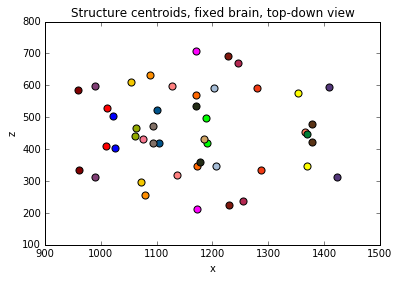

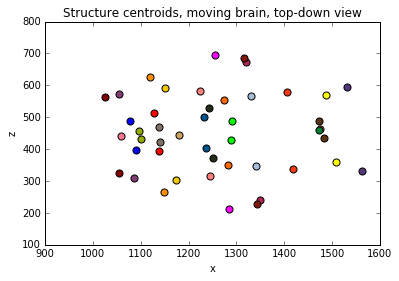

In [6]:
for label, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()
    
for label, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(label)])/255., marker='o', s=50)
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

Then for each brain, compute the midway point of every pair and fit a plane to the set of midway points.

In [7]:
midplane_points_fixed_rel2fixedWholebrain = compute_midpoints(structure_centroids_fixed_rel2fixedWholebrain)
midplane_vector_fixed, midplane_centroid_fixed_rel2fixedWholebrain = fit_plane(midplane_points_fixed_rel2fixedWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_fixed
print 'mid-sagittal plane centroid =', midplane_centroid_fixed_rel2fixedWholebrain

mid-sagittal plane normal = [ 0.03480743 -0.09681632  0.99469344]
mid-sagittal plane centroid = [ 1173.6356091    547.16937249   454.65797041]


In [8]:
midplane_points_moving_rel2movingWholebrain = compute_midpoints(structure_centroids_moving_rel2movingWholebrain)
midplane_vector_moving, midplane_centroid_moving_rel2movingWholebrain = fit_plane(midplane_points_moving_rel2movingWholebrain.values())

print 'mid-sagittal plane normal =', midplane_vector_moving
print 'mid-sagittal plane centroid =', midplane_centroid_moving_rel2movingWholebrain

mid-sagittal plane normal = [-0.04337675 -0.01311538  0.99897269]
mid-sagittal plane centroid = [ 1261.49280839   448.82360573   452.73355344]


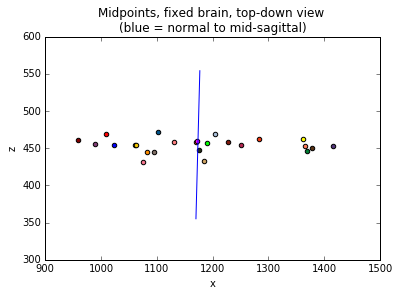

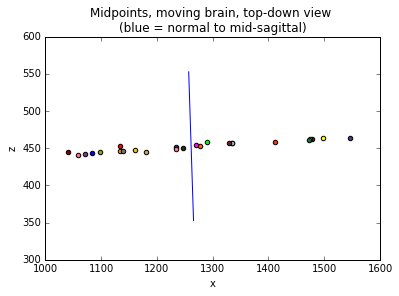

In [9]:
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')
    
d = 100
e1 = midplane_centroid_fixed_rel2fixedWholebrain - midplane_vector_fixed * d
e2 = midplane_centroid_fixed_rel2fixedWholebrain + midplane_vector_fixed * d
plt.plot([e1[0], e2[0]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, fixed brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

####################

for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='o')

d = 100
e1 = midplane_centroid_moving_rel2movingWholebrain - midplane_vector_moving * d
e2 = midplane_centroid_moving_rel2movingWholebrain + midplane_vector_moving * d
plt.plot([e1[0], e2[0]], [e1[2], e2[2]])
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Midpoints, moving brain, top-down view \n(blue = normal to mid-sagittal)');
plt.show()

Compute the rotation for the moving brain that aligns the two mid-planes in both brains.

In [10]:
R = R_align_two_vectors(midplane_vector_moving, midplane_vector_fixed)

In [11]:
T_align_midplane = np.zeros((3,4))
T_align_midplane[:3, :3] = R
T_align_midplane = T_align_midplane.flatten()

# print T_align_midplane.reshape((3,4))

transform_parameters_midplane_aligned = {
    'parameters': T_align_midplane,
    'centroid_m_wrt_wholebrain': midplane_centroid_moving_rel2movingWholebrain,
    'centroid_f_wrt_wholebrain': midplane_centroid_fixed_rel2fixedWholebrain
}

transform_matrix_midplane_aligned = convert_transform_forms(out_form=(4,4), transform=transform_parameters_midplane_aligned)
# transform_matrix_midplane_aligned = alignment_parameters_to_transform_matrix_v2(transform_parameters=transform_parameters_midplane_aligned)

print transform_matrix_midplane_aligned

[[  9.96944030e-01  -1.38616927e-03   7.81136352e-02  -1.18744634e+02]
 [  7.92601078e-03   9.96477782e-01  -8.34891096e-02   1.27726337e+02]
 [ -7.77228398e-02   8.38530357e-02   9.93443559e-01   6.53043193e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


Apply the rotation to the moving brain.

In [12]:
volume_moving_midplaneAligned_rel2fixedWholebrain = \
{label_s: transform_volume_v4(volume=(vol.astype(np.int), origin),                              
                              transform=transform_parameters_midplane_aligned,
                              return_origin_instead_of_bbox=True) 
 for label_s, (vol, origin) in volume_moving.iteritems()}

Interpolating/filling sparse volume: 0.08 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.15 seconds.
Interpolating/filling sparse volume: 0.13 seconds.
Interpolating/filling sparse volume: 0.31 seconds.
Interpolating/filling sparse volume: 0.25 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.01 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.19 seconds.
Interpolating/filling sparse volume: 0.22 seconds.
Interpolating/filling sparse volume: 0.22 seconds.
Interpolating/filling sparse volume: 0.17 seconds.
Interpolating/filling sparse volume: 0.04 seconds.
Interpolating/filling sparse volume: 0.05 seconds.
Interpolating/filling sparse volume: 0.28 seconds.
Interpolating/filling sparse vo

Visualize the center-of-masses after rotation.

In [13]:
structure_centroids_m_midplaneAligned_rel2fixedWholebrain = \
{midsagittal_aligner_parameters['label_to_structure_moving'][i]: c 
 for i, c in get_structure_centroids(vol_origin_dict=volume_moving_midplaneAligned_rel2fixedWholebrain).iteritems()}

In [14]:
midplane_points_m_midplaneAligned_rel2fixedWholebrain = \
compute_midpoints(structure_centroids_m_midplaneAligned_rel2fixedWholebrain)

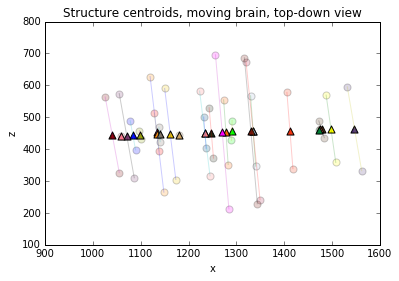

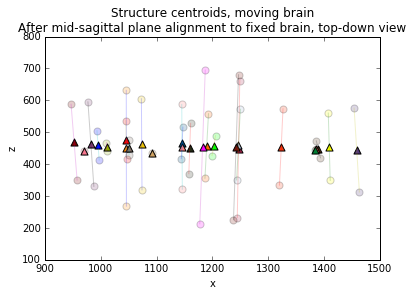

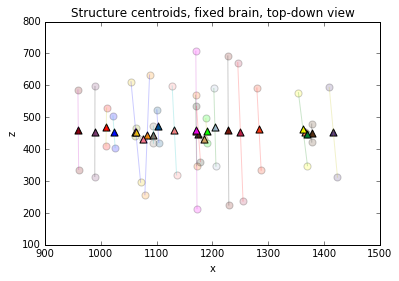

In [15]:
for name_s, c in structure_centroids_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_moving_rel2movingWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_moving_rel2movingWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_moving_rel2movingWholebrain:
            e1 = structure_centroids_moving_rel2movingWholebrain[name_l]
        if name_r in structure_centroids_moving_rel2movingWholebrain:
            e2 = structure_centroids_moving_rel2movingWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)

for name_u, c in midplane_points_m_midplaneAligned_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_m_midplaneAligned_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e1 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_m_midplaneAligned_rel2fixedWholebrain:
            e2 = structure_centroids_m_midplaneAligned_rel2fixedWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);   
    
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, moving brain\nAfter mid-sagittal plane alignment to fixed brain, top-down view');
plt.show()

##########################################################

for name_s, c in structure_centroids_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                marker='o', alpha=.2, s=50)
    
for name_u, c in midplane_points_fixed_rel2fixedWholebrain.iteritems():
    plt.scatter(c[0], c[2], c=np.array(name_unsided_to_color[name_u])/255., marker='^', s=50)
    
for name_u in set([convert_to_original_name(name_s) 
                   for name_s in structure_centroids_fixed_rel2fixedWholebrain.keys()]):
    if name_u not in singular_structures:
        name_l = convert_to_left_name(name_u)
        name_r = convert_to_right_name(name_u)
        if name_l in structure_centroids_fixed_rel2fixedWholebrain:
            e1 = structure_centroids_fixed_rel2fixedWholebrain[name_l]
        if name_r in structure_centroids_fixed_rel2fixedWholebrain:
            e2 = structure_centroids_fixed_rel2fixedWholebrain[name_r]
        plt.plot((e1[0], e2[0]), (e1[2], e2[2]), alpha=.2);
    
plt.xlabel('x');
plt.ylabel('z');
plt.title('Structure centroids, fixed brain, top-down view');
plt.show()

In [17]:
# for name_s in all_known_structures_sided:
    
#     print name_s
    
#     try:
#         volume, origin_wrt_wholebrain = \
#             DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
#                                                    structure=name_s,
#                                                   resolution='10.0um',
#                                                   return_origin_instead_of_bbox=True)

#     except:
#         sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
#         continue
            
#     vol, bbox_wrt_fixedWholebrain = \
#     transform_volume_v3(vol=volume.astype(np.int), 
#                         origin=origin_wrt_wholebrain,
#                       tf_params=T_align_midplane, 
#                       centroid_m=midplane_centroid_moving_rel2movingWholebrain,
#                       centroid_f=midplane_centroid_fixed_rel2fixedWholebrain,
#                              return_origin_instead_of_bbox=False)
    
#     vol_fp = DataManager.get_transformed_volume_filepath_v2(midsagittal_alignment_spec, structure=name_s)
#     create_parent_dir_if_not_exists(vol_fp)
#     bp.pack_ndarray_file(vol, vol_fp)
#     upload_to_s3(vol_fp)
    
#     bbox_fp = \
#     DataManager.get_transformed_volume_bbox_filepath_v2(midsagittal_alignment_spec, 
#                                                         structure=name_s, 
#                                                         wrt='fixedWholebrain')
#     create_parent_dir_if_not_exists(bbox_fp)
#     np.savetxt(bbox_fp, bbox_wrt_fixedWholebrain)
#     upload_to_s3(bbox_fp)

# Affine registration, under the constaint that mid-sagittal plane is aligned.

In [16]:
affine_alignment_spec = dict(stack_m=stack_m_spec, 
                            stack_f=stack_f_spec,
                            warp_setting=109)

In [17]:
affine_aligner_parameters = \
generate_aligner_parameters_v2(alignment_spec=affine_alignment_spec,
structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
structures_f=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
fixed_structures_are_sided=True)

upstream_warp_id                                                               None
transform_type                                                                rigid
grad_computation_sample_number                                               100000
grid_search_sample_number                                                     10000
std_tx_um                                                                      2000
std_ty_um                                                                      2000
std_tz_um                                                                      2000
std_theta_xy_degree                                                              30
surround_weight                                                                 NaN
regularization_weight                                                           NaN
terminate_thresh_trans                                                          NaN
terminate_thresh_rot                                                        

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].
Prior structure/index map not found. Generating a new one.
Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'AP', 'Amb_L', 'Amb_R', 'DC_L', 'DC_R', 'IC', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'PBG_L', 'PBG_R', 'Pn_L', 'Pn_R', 'RMC_L', 'RMC_R', 'SC', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'Tz_L', 'Tz_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'VLL_L', 'VLL_R'].


In [18]:
volume_fixed = affine_aligner_parameters['volume_fixed']
volume_moving = affine_aligner_parameters['volume_moving']

In [19]:
from aligner_v3 import *

In [20]:
aligner = Aligner(volume_fixed, volume_moving, labelIndexMap_m2f=affine_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [21]:
aligner.set_initial_transform(transform=transform_matrix_midplane_aligned)

Set initial transform to [  9.96944030e-01  -1.38616927e-03   7.81136352e-02  -1.18744634e+02
   7.92601078e-03   9.96477782e-01  -8.34891096e-02   1.27726337e+02
  -7.77228398e-02   8.38530357e-02   9.93443559e-01   6.53043193e+01].


In [22]:
# aligner.set_centroid(centroid_m=(0,0,0), centroid_f=(0,0,0))
# aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m=np.array([1254 , 478 , 457]), centroid_f=np.array([1224 , 483,  464]))
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[structure_to_label_moving['IC']])

centroid_m: [ 1235.30123328   481.7924058    447.60297795], centroid_f: [1224  484  463]


In [23]:
aligner.compute_gradient(smooth_first=True)

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])


In [35]:
# gradients_f = compute_gradient_v2(volume_fixed, smooth_first=True)
# aligner.load_gradient(gradients=gradients_f)

In [24]:
aligner.set_label_weights(label_weights=affine_aligner_parameters['label_weights_m'])

In [25]:
T, scores = aligner.optimize(tf_type=affine_aligner_parameters['transform_type'], 
#                              max_iter_num=200,
                             max_iter_num=100,
                             history_len=50, 
#                              terminate_thresh=1e-4,
                             terminate_thresh_trans=.01,
                             grad_computation_sample_number=100000,
                             full_lr=np.array([10,10,0,0,0,.1]), # shift along z axis, rotations around x axis and y axis are frozen
#                              full_lr=np.array([0,0,0,0,0,0]), # Freeze shift along z axis and rotations around x axis and y axis
#                              init_T=init_T
                            )                                  
# traj = aligner.Ts

1: 55461 valid, 39265 out-of-bound voxels after transform.
2: 74043 valid, 4892 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score for 3: 3: No valid voxels after transform.
4: 0 valid, 4424 out-of-bound voxels after transform.
Error computing score for 4: 4: No valid voxels after transform.
5: 27715 valid, 160410 out-of-bound voxels after transform.
6: 96507 valid, 99040 out-of-bound voxels after transform.
7: 58427 valid, 14699 out-of-bound voxels after transform.
8: 60479 valid, 10094 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score for 9: 9: No valid voxels after transform.
10: 0 valid, 4885 out-of-bound voxels after transform.
Error computing score for 10: 10: No valid voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 9555 valid, 12771 out-of-bound voxels after transform.
13: 4711 valid, 120671 out-of-bound voxels after tra

2: 74475 valid, 4460 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 277 valid, 4147 out-of-bound voxels after transform.
5: 38417 valid, 61583 out-of-bound voxels after transform.
6: 88169 valid, 11831 out-of-bound voxels after transform.
7: 58822 valid, 14304 out-of-bound voxels after transform.
8: 66293 valid, 4280 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 389 valid, 4496 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 5963 valid, 16363 out-of-bound voxels after transform.
13: 51705 valid, 48295 out-of-bound voxels after transform.
14: 72898 valid, 27102 out-of-bound voxels after transform.
15: 51836 valid, 48164 out-of-bound voxels after transform.
16: 82727 valid, 17273 out-of-bound voxels 

16: 81195 valid, 18805 out-of-bound voxels after transform.
17: 35933 valid, 3210 out-of-bound voxels after transform.
18: 40570 valid, 3569 out-of-bound voxels after transform.
19: 38877 valid, 61123 out-of-bound voxels after transform.
20: 88386 valid, 11614 out-of-bound voxels after transform.
21: 2963 valid, 54954 out-of-bound voxels after transform.
22: 14623 valid, 41999 out-of-bound voxels after transform.
23: 10034 valid, 20660 out-of-bound voxels after transform.
24: 5402 valid, 23652 out-of-bound voxels after transform.
25: 67495 valid, 32505 out-of-bound voxels after transform.
26: 63649 valid, 36351 out-of-bound voxels after transform.
27: 1 valid, 18380 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-

32: 94315 valid, 5685 out-of-bound voxels after transform.
33: 140 valid, 16295 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7863 valid, 4834 out-of-bound voxels after transform.
36: 12060 valid, 221 out-of-bound voxels after transform.
37: 89379 valid, 10621 out-of-bound voxels after transform.
38: 98775 valid, 1225 out-of-bound voxels after transform.
39: 46655 valid, 33217 out-of-bound voxels after transform.
40: 72228 valid, 5111 out-of-bound voxels after transform.
41: 99966 valid, 34 out-of-bound voxels after transform.
42: 89273 valid, 10727 out-of-bound voxels after transform.
43: 10342 valid, 11362 out-of-bound voxels after transform.
44: 88272 valid, 11728 out-of-bound voxels after transform.
45: 74106 valid, 25894 out-of-bound voxels after transform.
46: 91817 valid, 8183 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.542257

2: 74244 valid, 4691 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 1190 valid, 3234 out-of-bound voxels after transform.
5: 62186 valid, 37814 out-of-bound voxels after transform.
6: 91266 valid, 8734 out-of-bound voxels after transform.
7: 60465 valid, 12661 out-of-bound voxels after transform.
8: 68669 valid, 1904 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2760 valid, 2125 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 13437 valid, 8889 out-of-bound voxels after transform.
13: 70974 valid, 29026 out-of-bound voxels after transform.
14: 88635 valid, 11365 out-of-bound voxels after transform.
15: 61042 valid, 38958 out-of-bound voxels after transform.
16: 91768 valid, 8232 out-of-bound voxels 

19: 43812 valid, 56188 out-of-bound voxels after transform.
20: 93915 valid, 6085 out-of-bound voxels after transform.
21: 4095 valid, 53822 out-of-bound voxels after transform.
22: 11957 valid, 44665 out-of-bound voxels after transform.
23: 9250 valid, 21444 out-of-bound voxels after transform.
24: 7433 valid, 21621 out-of-bound voxels after transform.
25: 63894 valid, 36106 out-of-bound voxels after transform.
26: 60358 valid, 39642 out-of-bound voxels after transform.
27: 0 valid, 18381 out-of-bound voxels after transform.
Error computing score/gradient for 27: 27: No valid voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform

37: 90592 valid, 9408 out-of-bound voxels after transform.
38: 96687 valid, 3313 out-of-bound voxels after transform.
39: 49696 valid, 30176 out-of-bound voxels after transform.
40: 70582 valid, 6757 out-of-bound voxels after transform.
41: 99999 valid, 1 out-of-bound voxels after transform.
42: 82998 valid, 17002 out-of-bound voxels after transform.
43: 10230 valid, 11474 out-of-bound voxels after transform.
44: 88093 valid, 11907 out-of-bound voxels after transform.
45: 77656 valid, 22344 out-of-bound voxels after transform.
46: 93652 valid, 6348 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.478666
Norm of gradient (rotation) = 0.547656
around x=0.00; around y=-0.00; around z=13.38
step: 6.53 seconds
current score: 0.330549
new_T: [  0.97284283  -0.2314667    0.          10.07944088   0.2314667
   0.97284283   0.          23.62320558   0.           0.           1.           0.        ]
det: 1.00

iteration 13
1: 50332 valid, 44394 out-of-bound voxels after t

6: 95322 valid, 4678 out-of-bound voxels after transform.
7: 59519 valid, 13607 out-of-bound voxels after transform.
8: 68791 valid, 1782 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2841 valid, 2044 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 13553 valid, 8773 out-of-bound voxels after transform.
13: 66771 valid, 33229 out-of-bound voxels after transform.
14: 84408 valid, 15592 out-of-bound voxels after transform.
15: 61793 valid, 38207 out-of-bound voxels after transform.
16: 87307 valid, 12693 out-of-bound voxels after transform.
17: 37021 valid, 2122 out-of-bound voxels after transform.
18: 41166 valid, 2973 out-of-bound voxels after transform.
19: 42652 valid, 57348 out-of-bound voxels after transform.
20: 93732 valid, 6268 out-of-bound voxels after transform.
21: 5647 valid, 52270 out-of-bound voxels after

26: 68971 valid, 31029 out-of-bound voxels after transform.
27: 310 valid, 18071 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 92934 valid, 7066 out-of-bound voxels after transform.
32: 92040 valid, 7960 out-of-bound voxels after transform.
33: 79 valid, 16356 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7905 valid, 4792 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90083 valid, 9917 out-of-bound voxels after transform.
38: 97

44: 86186 valid, 13814 out-of-bound voxels after transform.
45: 80892 valid, 19108 out-of-bound voxels after transform.
46: 94735 valid, 5265 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.267627
Norm of gradient (rotation) = 0.347621
around x=0.00; around y=-0.00; around z=12.94
step: 3.56 seconds
current score: 0.413649
new_T: [  0.97461176  -0.2239016    0.          13.00762074   0.2239016
   0.97461176   0.          21.58296895   0.           0.           1.           0.        ]
det: 1.00

iteration 20
1: 53085 valid, 41641 out-of-bound voxels after transform.
2: 74120 valid, 4815 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 1144 valid, 3280 out-of-bound voxels after transform.
5: 64128 valid, 35872 out-of-bound voxels after transform.
6: 93802 valid, 6198 out-of-bound voxels after transform.
7: 60097 valid, 13029 out-of-bound voxels a

11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14212 valid, 8114 out-of-bound voxels after transform.
13: 68333 valid, 31667 out-of-bound voxels after transform.
14: 85439 valid, 14561 out-of-bound voxels after transform.
15: 63109 valid, 36891 out-of-bound voxels after transform.
16: 89916 valid, 10084 out-of-bound voxels after transform.
17: 37089 valid, 2054 out-of-bound voxels after transform.
18: 41232 valid, 2907 out-of-bound voxels after transform.
19: 43411 valid, 56589 out-of-bound voxels after transform.
20: 94492 valid, 5508 out-of-bound voxels after transform.
21: 6801 valid, 51116 out-of-bound voxels after transform.
22: 21137 valid, 35485 out-of-bound voxels after transform.
23: 12041 valid, 18653 out-of-bound voxels after transform.
24: 8683 valid, 20371 out-of-bound voxels after transform.
25: 71683 valid, 28317 out-of-bound voxels after transform.
26: 69447 valid, 30553 out-of-bound voxels after transform.
27: 475 valid, 17906 out-of-bound voxels after tra

31: 93210 valid, 6790 out-of-bound voxels after transform.
32: 92288 valid, 7712 out-of-bound voxels after transform.
33: 65 valid, 16370 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7923 valid, 4774 out-of-bound voxels after transform.
36: 12175 valid, 106 out-of-bound voxels after transform.
37: 90491 valid, 9509 out-of-bound voxels after transform.
38: 96456 valid, 3544 out-of-bound voxels after transform.
39: 48391 valid, 31481 out-of-bound voxels after transform.
40: 71259 valid, 6080 out-of-bound voxels after transform.
41: 99998 valid, 2 out-of-bound voxels after transform.
42: 85251 valid, 14749 out-of-bound voxels after transform.
43: 10308 valid, 11396 out-of-bound voxels after transform.
44: 86546 valid, 13454 out-of-bound voxels after transform.
45: 81763 valid, 18237 out-of-bound voxels after transform.
46: 95079 valid, 4921 out-of-bound voxels af

2: 74060 valid, 4875 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 1129 valid, 3295 out-of-bound voxels after transform.
5: 64271 valid, 35729 out-of-bound voxels after transform.
6: 94377 valid, 5623 out-of-bound voxels after transform.
7: 59963 valid, 13163 out-of-bound voxels after transform.
8: 68595 valid, 1978 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2808 valid, 2077 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14373 valid, 7953 out-of-bound voxels after transform.
13: 67373 valid, 32627 out-of-bound voxels after transform.
14: 84592 valid, 15408 out-of-bound voxels after transform.
15: 63244 valid, 36756 out-of-bound voxels after transform.
16: 89704 valid, 10296 out-of-bound voxels

20: 94495 valid, 5505 out-of-bound voxels after transform.
21: 7692 valid, 50225 out-of-bound voxels after transform.
22: 23217 valid, 33405 out-of-bound voxels after transform.
23: 12755 valid, 17939 out-of-bound voxels after transform.
24: 9142 valid, 19912 out-of-bound voxels after transform.
25: 73094 valid, 26906 out-of-bound voxels after transform.
26: 71346 valid, 28654 out-of-bound voxels after transform.
27: 781 valid, 17600 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 92870 valid, 7130 out-of-bound voxels after transform.
32: 91712 valid, 8288 out-of-bound voxels after transform.
33: 57 valid,

37: 90588 valid, 9412 out-of-bound voxels after transform.
38: 96141 valid, 3859 out-of-bound voxels after transform.
39: 48459 valid, 31413 out-of-bound voxels after transform.
40: 71109 valid, 6230 out-of-bound voxels after transform.
41: 99999 valid, 1 out-of-bound voxels after transform.
42: 84617 valid, 15383 out-of-bound voxels after transform.
43: 10296 valid, 11408 out-of-bound voxels after transform.
44: 85778 valid, 14222 out-of-bound voxels after transform.
45: 83240 valid, 16760 out-of-bound voxels after transform.
46: 95521 valid, 4479 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.193359
Norm of gradient (rotation) = 0.267211
around x=0.00; around y=-0.00; around z=13.66
step: 5.38 seconds
current score: 0.431381
new_T: [  0.97173096  -0.23609095   0.          14.32878091   0.23609095
   0.97173096   0.          21.87712697   0.           0.           1.           0.        ]
det: 1.00

iteration 32
1: 53436 valid, 41290 out-of-bound voxels after 

5: 64279 valid, 35721 out-of-bound voxels after transform.
6: 94359 valid, 5641 out-of-bound voxels after transform.
7: 59968 valid, 13158 out-of-bound voxels after transform.
8: 68539 valid, 2034 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2766 valid, 2119 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14592 valid, 7734 out-of-bound voxels after transform.
13: 66834 valid, 33166 out-of-bound voxels after transform.
14: 83870 valid, 16130 out-of-bound voxels after transform.
15: 63336 valid, 36664 out-of-bound voxels after transform.
16: 89792 valid, 10208 out-of-bound voxels after transform.
17: 36951 valid, 2192 out-of-bound voxels after transform.
18: 41277 valid, 2862 out-of-bound voxels after transform.
19: 43553 valid, 56447 out-of-bound voxels after transform.
20: 94507 valid, 5493 out-of-bound voxels after

25: 74106 valid, 25894 out-of-bound voxels after transform.
26: 72590 valid, 27410 out-of-bound voxels after transform.
27: 1094 valid, 17287 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 92252 valid, 7748 out-of-bound voxels after transform.
32: 91389 valid, 8611 out-of-bound voxels after transform.
33: 48 valid, 16387 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7932 valid, 4765 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 

44: 85280 valid, 14720 out-of-bound voxels after transform.
45: 84051 valid, 15949 out-of-bound voxels after transform.
46: 95705 valid, 4295 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.172711
Norm of gradient (rotation) = 0.239568
around x=0.00; around y=-0.00; around z=13.89
step: 3.50 seconds
current score: 0.434228
new_T: [  0.97076288  -0.24004049   0.          14.93187416   0.24004049
   0.97076288   0.          21.97709567   0.           0.           1.           0.        ]
det: 1.00

iteration 39
1: 53688 valid, 41038 out-of-bound voxels after transform.
2: 73859 valid, 5076 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 1061 valid, 3363 out-of-bound voxels after transform.
5: 64237 valid, 35763 out-of-bound voxels after transform.
6: 94463 valid, 5537 out-of-bound voxels after transform.
7: 59996 valid, 13130 out-of-bound voxels 

11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14715 valid, 7611 out-of-bound voxels after transform.
13: 66348 valid, 33652 out-of-bound voxels after transform.
14: 83311 valid, 16689 out-of-bound voxels after transform.
15: 63684 valid, 36316 out-of-bound voxels after transform.
16: 89887 valid, 10113 out-of-bound voxels after transform.
17: 36832 valid, 2311 out-of-bound voxels after transform.
18: 41281 valid, 2858 out-of-bound voxels after transform.
19: 43616 valid, 56384 out-of-bound voxels after transform.
20: 94553 valid, 5447 out-of-bound voxels after transform.
21: 8693 valid, 49224 out-of-bound voxels after transform.
22: 25405 valid, 31217 out-of-bound voxels after transform.
23: 13486 valid, 17208 out-of-bound voxels after transform.
24: 9734 valid, 19320 out-of-bound voxels after transform.
25: 74855 valid, 25145 out-of-bound voxels after transform.
26: 73433 valid, 26567 out-of-bound voxels after transform.
27: 1211 valid, 17170 out-of-bound voxels after tr

31: 91953 valid, 8047 out-of-bound voxels after transform.
32: 90931 valid, 9069 out-of-bound voxels after transform.
33: 44 valid, 16391 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7933 valid, 4764 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90634 valid, 9366 out-of-bound voxels after transform.
38: 95529 valid, 4471 out-of-bound voxels after transform.
39: 48690 valid, 31182 out-of-bound voxels after transform.
40: 70799 valid, 6540 out-of-bound voxels after transform.
42: 83700 valid, 16300 out-of-bound voxels after transform.
43: 10271 valid, 11433 out-of-bound voxels after transform.
44: 84876 valid, 15124 out-of-bound voxels after transform.
45: 84822 valid, 15178 out-of-bound voxels after transform.
46: 95749 valid, 4251 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.161751

4: 1020 valid, 3404 out-of-bound voxels after transform.
5: 64301 valid, 35699 out-of-bound voxels after transform.
6: 94413 valid, 5587 out-of-bound voxels after transform.
7: 59987 valid, 13139 out-of-bound voxels after transform.
8: 68448 valid, 2125 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2691 valid, 2194 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14826 valid, 7500 out-of-bound voxels after transform.
13: 66292 valid, 33708 out-of-bound voxels after transform.
14: 83232 valid, 16768 out-of-bound voxels after transform.
15: 63659 valid, 36341 out-of-bound voxels after transform.
16: 90062 valid, 9938 out-of-bound voxels after transform.
17: 36769 valid, 2374 out-of-bound voxels after transform.
18: 41285 valid, 2854 out-of-bound voxels after transform.
19: 43597 valid, 56403 out-of-bound voxels after tr

25: 75110 valid, 24890 out-of-bound voxels after transform.
26: 74086 valid, 25914 out-of-bound voxels after transform.
27: 1385 valid, 16996 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 91754 valid, 8246 out-of-bound voxels after transform.
32: 90814 valid, 9186 out-of-bound voxels after transform.
33: 42 valid, 16393 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7933 valid, 4764 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 

45: 85076 valid, 14924 out-of-bound voxels after transform.
46: 95869 valid, 4131 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.148929
Norm of gradient (rotation) = 0.206862
around x=0.00; around y=-0.00; around z=14.12
step: 4.03 seconds
current score: 0.440322
new_T: [  0.9697674   -0.24403112   0.          15.64275882   0.24403112
   0.9697674    0.          22.02849467   0.           0.           1.           0.        ]
det: 1.00

iteration 51
1: 54002 valid, 40724 out-of-bound voxels after transform.
2: 73712 valid, 5223 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 1020 valid, 3404 out-of-bound voxels after transform.
5: 63858 valid, 36142 out-of-bound voxels after transform.
6: 94317 valid, 5683 out-of-bound voxels after transform.
7: 59987 valid, 13139 out-of-bound voxels after transform.
8: 68448 valid, 2125 out-of-bound voxels af

14: 82699 valid, 17301 out-of-bound voxels after transform.
15: 63794 valid, 36206 out-of-bound voxels after transform.
16: 89900 valid, 10100 out-of-bound voxels after transform.
17: 36700 valid, 2443 out-of-bound voxels after transform.
18: 41293 valid, 2846 out-of-bound voxels after transform.
19: 43687 valid, 56313 out-of-bound voxels after transform.
20: 94560 valid, 5440 out-of-bound voxels after transform.
21: 9426 valid, 48491 out-of-bound voxels after transform.
22: 26516 valid, 30106 out-of-bound voxels after transform.
23: 13959 valid, 16735 out-of-bound voxels after transform.
24: 10109 valid, 18945 out-of-bound voxels after transform.
25: 75421 valid, 24579 out-of-bound voxels after transform.
26: 74517 valid, 25483 out-of-bound voxels after transform.
27: 1477 valid, 16904 out-of-bound voxels after transform.
28: 0 valid, 23215 out-of-bound voxels after transform.
Error computing score/gradient for 28: 28: No valid voxels after transform.
29: 0 valid, 2268 out-of-bound vo

38: 95213 valid, 4787 out-of-bound voxels after transform.
39: 48776 valid, 31096 out-of-bound voxels after transform.
40: 70668 valid, 6671 out-of-bound voxels after transform.
42: 82990 valid, 17010 out-of-bound voxels after transform.
43: 10247 valid, 11457 out-of-bound voxels after transform.
44: 84448 valid, 15552 out-of-bound voxels after transform.
45: 85518 valid, 14482 out-of-bound voxels after transform.
46: 96153 valid, 3847 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.141527
Norm of gradient (rotation) = 0.196940
around x=0.00; around y=-0.00; around z=14.20
step: 3.89 seconds
current score: 0.438879
new_T: [  0.96942758  -0.24537759   0.          15.83598782   0.24537759
   0.96942758   0.          22.07960634   0.           0.           1.           0.        ]
det: 1.00

iteration 56
1: 54003 valid, 40723 out-of-bound voxels after transform.
2: 73635 valid, 5300 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after tra

8: 68421 valid, 2152 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2657 valid, 2228 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14939 valid, 7387 out-of-bound voxels after transform.
13: 65675 valid, 34325 out-of-bound voxels after transform.
14: 82441 valid, 17559 out-of-bound voxels after transform.
15: 63976 valid, 36024 out-of-bound voxels after transform.
16: 90122 valid, 9878 out-of-bound voxels after transform.
17: 36631 valid, 2512 out-of-bound voxels after transform.
18: 41293 valid, 2846 out-of-bound voxels after transform.
19: 43580 valid, 56420 out-of-bound voxels after transform.
20: 94537 valid, 5463 out-of-bound voxels after transform.
21: 9612 valid, 48305 out-of-bound voxels after transform.
22: 26858 valid, 29764 out-of-bound voxels after transform.
23: 14053 valid, 16641 out-of-bound voxels aft

31: 91309 valid, 8691 out-of-bound voxels after transform.
32: 90377 valid, 9623 out-of-bound voxels after transform.
33: 35 valid, 16400 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7936 valid, 4761 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90553 valid, 9447 out-of-bound voxels after transform.
38: 95180 valid, 4820 out-of-bound voxels after transform.
39: 48803 valid, 31069 out-of-bound voxels after transform.
40: 70572 valid, 6767 out-of-bound voxels after transform.
42: 82976 valid, 17024 out-of-bound voxels after transform.
43: 10245 valid, 11459 out-of-bound voxels after transform.
44: 84175 valid, 15825 out-of-bound voxels after transform.
45: 85543 valid, 14457 out-of-bound voxels after transform.
46: 96181 valid, 3819 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.135166

6: 94358 valid, 5642 out-of-bound voxels after transform.
7: 59979 valid, 13147 out-of-bound voxels after transform.
8: 68394 valid, 2179 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2657 valid, 2228 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14980 valid, 7346 out-of-bound voxels after transform.
13: 65509 valid, 34491 out-of-bound voxels after transform.
14: 82403 valid, 17597 out-of-bound voxels after transform.
15: 63913 valid, 36087 out-of-bound voxels after transform.
16: 90131 valid, 9869 out-of-bound voxels after transform.
17: 36617 valid, 2526 out-of-bound voxels after transform.
18: 41293 valid, 2846 out-of-bound voxels after transform.
19: 43716 valid, 56284 out-of-bound voxels after transform.
20: 94570 valid, 5430 out-of-bound voxels after transform.
21: 9748 valid, 48169 out-of-bound voxels after 

32: 90235 valid, 9765 out-of-bound voxels after transform.
33: 35 valid, 16400 out-of-bound voxels after transform.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7939 valid, 4758 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90693 valid, 9307 out-of-bound voxels after transform.
38: 95036 valid, 4964 out-of-bound voxels after transform.
39: 48803 valid, 31069 out-of-bound voxels after transform.
40: 70557 valid, 6782 out-of-bound voxels after transform.
42: 82848 valid, 17152 out-of-bound voxels after transform.
43: 10236 valid, 11468 out-of-bound voxels after transform.
44: 84348 valid, 15652 out-of-bound voxels after transform.
45: 85616 valid, 14384 out-of-bound voxels after transform.
46: 96148 valid, 3852 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.129450
Norm of gradient (rotation) = 0.180333
around x=0.00; arou

5: 63874 valid, 36126 out-of-bound voxels after transform.
6: 94364 valid, 5636 out-of-bound voxels after transform.
7: 59976 valid, 13150 out-of-bound voxels after transform.
8: 68384 valid, 2189 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2634 valid, 2251 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 14993 valid, 7333 out-of-bound voxels after transform.
13: 65536 valid, 34464 out-of-bound voxels after transform.
14: 82239 valid, 17761 out-of-bound voxels after transform.
15: 63788 valid, 36212 out-of-bound voxels after transform.
16: 90189 valid, 9811 out-of-bound voxels after transform.
17: 36590 valid, 2553 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43691 valid, 56309 out-of-bound voxels after transform.
20: 94561 valid, 5439 out-of-bound voxels after 

27: 1739 valid, 16642 out-of-bound voxels after transform.
28: 2 valid, 23213 out-of-bound voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 91156 valid, 8844 out-of-bound voxels after transform.
32: 90340 valid, 9660 out-of-bound voxels after transform.
33: 33 valid, 16402 out-of-bound voxels after transform.
Error computing score/gradient for 33: Image gradient at all valid voxel is zero.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7939 valid, 4758 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90673 valid, 9327 out-of-bound voxels after transform.
38: 94933 valid, 5067 out-of-bound voxels after transform.


45: 86014 valid, 13986 out-of-bound voxels after transform.
46: 96301 valid, 3699 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.122422
Norm of gradient (rotation) = 0.170676
around x=0.00; around y=-0.00; around z=14.34
step: 3.80 seconds
current score: 0.435066
new_T: [  0.96883649  -0.24770114   0.          16.25534146   0.24770114
   0.96883649   0.          22.09322945   0.           0.           1.           0.        ]
det: 1.00

iteration 73
1: 54161 valid, 40565 out-of-bound voxels after transform.
2: 73552 valid, 5383 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 961 valid, 3463 out-of-bound voxels after transform.
5: 63891 valid, 36109 out-of-bound voxels after transform.
6: 94401 valid, 5599 out-of-bound voxels after transform.
7: 59973 valid, 13153 out-of-bound voxels after transform.
8: 68365 valid, 2208 out-of-bound voxels aft

14: 82066 valid, 17934 out-of-bound voxels after transform.
15: 63704 valid, 36296 out-of-bound voxels after transform.
16: 90180 valid, 9820 out-of-bound voxels after transform.
17: 36530 valid, 2613 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43702 valid, 56298 out-of-bound voxels after transform.
20: 94523 valid, 5477 out-of-bound voxels after transform.
21: 9960 valid, 47957 out-of-bound voxels after transform.
22: 27638 valid, 28984 out-of-bound voxels after transform.
23: 14330 valid, 16364 out-of-bound voxels after transform.
24: 10468 valid, 18586 out-of-bound voxels after transform.
25: 76216 valid, 23784 out-of-bound voxels after transform.
26: 75353 valid, 24647 out-of-bound voxels after transform.
27: 1758 valid, 16623 out-of-bound voxels after transform.
28: 3 valid, 23212 out-of-bound voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid vox

38: 94946 valid, 5054 out-of-bound voxels after transform.
39: 48837 valid, 31035 out-of-bound voxels after transform.
40: 70516 valid, 6823 out-of-bound voxels after transform.
42: 82575 valid, 17425 out-of-bound voxels after transform.
43: 10221 valid, 11483 out-of-bound voxels after transform.
44: 84085 valid, 15915 out-of-bound voxels after transform.
45: 86052 valid, 13948 out-of-bound voxels after transform.
46: 96297 valid, 3703 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.118107
Norm of gradient (rotation) = 0.164737
around x=0.00; around y=-0.00; around z=14.37
step: 4.80 seconds
current score: 0.434745
new_T: [  0.96872196  -0.24814867   0.          16.34367912   0.24814867
   0.96872196   0.          22.11462427   0.           0.           1.           0.        ]
det: 1.00

iteration 78
1: 54214 valid, 40512 out-of-bound voxels after transform.
2: 73544 valid, 5391 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after tra

8: 68353 valid, 2220 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2617 valid, 2268 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 15044 valid, 7282 out-of-bound voxels after transform.
13: 65331 valid, 34669 out-of-bound voxels after transform.
14: 81937 valid, 18063 out-of-bound voxels after transform.
15: 63948 valid, 36052 out-of-bound voxels after transform.
16: 90252 valid, 9748 out-of-bound voxels after transform.
17: 36530 valid, 2613 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43722 valid, 56278 out-of-bound voxels after transform.
20: 94542 valid, 5458 out-of-bound voxels after transform.
21: 10007 valid, 47910 out-of-bound voxels after transform.
22: 27691 valid, 28931 out-of-bound voxels after transform.
23: 14357 valid, 16337 out-of-bound voxels af

32: 90091 valid, 9909 out-of-bound voxels after transform.
33: 33 valid, 16402 out-of-bound voxels after transform.
Error computing score/gradient for 33: Image gradient at all valid voxel is zero.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7939 valid, 4758 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90787 valid, 9213 out-of-bound voxels after transform.
38: 94931 valid, 5069 out-of-bound voxels after transform.
39: 48837 valid, 31035 out-of-bound voxels after transform.
40: 70503 valid, 6836 out-of-bound voxels after transform.
42: 82559 valid, 17441 out-of-bound voxels after transform.
43: 10221 valid, 11483 out-of-bound voxels after transform.
44: 83861 valid, 16139 out-of-bound voxels after transform.
45: 86152 valid, 13848 out-of-bound voxels after transform.
46: 96361 valid, 3639 out-of-bound voxels after transform.
Norm of gradient (

5: 63998 valid, 36002 out-of-bound voxels after transform.
6: 94408 valid, 5592 out-of-bound voxels after transform.
7: 59973 valid, 13153 out-of-bound voxels after transform.
8: 68351 valid, 2222 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2617 valid, 2268 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 15048 valid, 7278 out-of-bound voxels after transform.
13: 65280 valid, 34720 out-of-bound voxels after transform.
14: 82111 valid, 17889 out-of-bound voxels after transform.
15: 63694 valid, 36306 out-of-bound voxels after transform.
16: 90054 valid, 9946 out-of-bound voxels after transform.
17: 36494 valid, 2649 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43653 valid, 56347 out-of-bound voxels after transform.
20: 94554 valid, 5446 out-of-bound voxels after 

28: 3 valid, 23212 out-of-bound voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels after transform.
Error computing score/gradient for 30: 30: No valid voxels after transform.
31: 91099 valid, 8901 out-of-bound voxels after transform.
32: 90105 valid, 9895 out-of-bound voxels after transform.
33: 33 valid, 16402 out-of-bound voxels after transform.
Error computing score/gradient for 33: Image gradient at all valid voxel is zero.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7941 valid, 4756 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90757 valid, 9243 out-of-bound voxels after transform.
38: 95005 valid, 4995 out-of-bound voxels after transform.
39: 48906 valid, 30966 out-of-bound voxels after transform.

Norm of gradient (translation) = 0.109535
Norm of gradient (rotation) = 0.153032
around x=0.00; around y=-0.00; around z=14.43
step: 3.55 seconds
current score: 0.435862
new_T: [  0.96846915  -0.24913351   0.          16.4415018    0.24913351
   0.96846915   0.          22.1619969    0.           0.           1.           0.        ]
det: 1.00

iteration 90
1: 54230 valid, 40496 out-of-bound voxels after transform.
2: 73515 valid, 5420 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 961 valid, 3463 out-of-bound voxels after transform.
5: 63965 valid, 36035 out-of-bound voxels after transform.
6: 94462 valid, 5538 out-of-bound voxels after transform.
7: 59973 valid, 13153 out-of-bound voxels after transform.
8: 68353 valid, 2220 out-of-bound voxels after transform.
9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid v

15: 63837 valid, 36163 out-of-bound voxels after transform.
16: 90231 valid, 9769 out-of-bound voxels after transform.
17: 36464 valid, 2679 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43751 valid, 56249 out-of-bound voxels after transform.
20: 94529 valid, 5471 out-of-bound voxels after transform.
21: 10154 valid, 47763 out-of-bound voxels after transform.
22: 27996 valid, 28626 out-of-bound voxels after transform.
23: 14447 valid, 16247 out-of-bound voxels after transform.
24: 10564 valid, 18490 out-of-bound voxels after transform.
25: 76508 valid, 23492 out-of-bound voxels after transform.
26: 75852 valid, 24148 out-of-bound voxels after transform.
27: 1865 valid, 16516 out-of-bound voxels after transform.
28: 3 valid, 23212 out-of-bound voxels after transform.
29: 0 valid, 2268 out-of-bound voxels after transform.
Error computing score/gradient for 29: 29: No valid voxels after transform.
30: 0 valid, 1913 out-of-bound voxels 

38: 94958 valid, 5042 out-of-bound voxels after transform.
39: 48906 valid, 30966 out-of-bound voxels after transform.
40: 70410 valid, 6929 out-of-bound voxels after transform.
42: 82278 valid, 17722 out-of-bound voxels after transform.
43: 10221 valid, 11483 out-of-bound voxels after transform.
44: 83955 valid, 16045 out-of-bound voxels after transform.
45: 86442 valid, 13558 out-of-bound voxels after transform.
46: 96391 valid, 3609 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.106231
Norm of gradient (rotation) = 0.148472
around x=0.00; around y=-0.00; around z=14.42
step: 4.92 seconds
current score: 0.435578
new_T: [  0.96848675  -0.24906508   0.          16.497351     0.24906508
   0.96848675   0.          22.12943118   0.           0.           1.           0.        ]
det: 1.00

iteration 95
1: 54266 valid, 40460 out-of-bound voxels after transform.
2: 73485 valid, 5450 out-of-bound voxels after transform.
3: 0 valid, 4197 out-of-bound voxels after tra

9: 0 valid, 4386 out-of-bound voxels after transform.
Error computing score/gradient for 9: 9: No valid voxels after transform.
10: 2617 valid, 2268 out-of-bound voxels after transform.
11: 9 valid, 34505 out-of-bound voxels after transform.
12: 15080 valid, 7246 out-of-bound voxels after transform.
13: 65186 valid, 34814 out-of-bound voxels after transform.
14: 81901 valid, 18099 out-of-bound voxels after transform.
15: 63894 valid, 36106 out-of-bound voxels after transform.
16: 90303 valid, 9697 out-of-bound voxels after transform.
17: 36445 valid, 2698 out-of-bound voxels after transform.
18: 41296 valid, 2843 out-of-bound voxels after transform.
19: 43633 valid, 56367 out-of-bound voxels after transform.
20: 94559 valid, 5441 out-of-bound voxels after transform.
21: 10156 valid, 47761 out-of-bound voxels after transform.
22: 28026 valid, 28596 out-of-bound voxels after transform.
23: 14447 valid, 16247 out-of-bound voxels after transform.
24: 10576 valid, 18478 out-of-bound voxels 

31: 90991 valid, 9009 out-of-bound voxels after transform.
32: 90100 valid, 9900 out-of-bound voxels after transform.
33: 31 valid, 16404 out-of-bound voxels after transform.
Error computing score/gradient for 33: Image gradient at all valid voxel is zero.
34: 0 valid, 15506 out-of-bound voxels after transform.
Error computing score/gradient for 34: 34: No valid voxels after transform.
35: 7941 valid, 4756 out-of-bound voxels after transform.
36: 12176 valid, 105 out-of-bound voxels after transform.
37: 90651 valid, 9349 out-of-bound voxels after transform.
38: 94943 valid, 5057 out-of-bound voxels after transform.
39: 48894 valid, 30978 out-of-bound voxels after transform.
40: 70412 valid, 6927 out-of-bound voxels after transform.
42: 82387 valid, 17613 out-of-bound voxels after transform.
43: 10212 valid, 11492 out-of-bound voxels after transform.
44: 83770 valid, 16230 out-of-bound voxels after transform.
45: 86307 valid, 13693 out-of-bound voxels after transform.
46: 96402 valid, 3

Best parameters =
[[  0.96844484  -0.249228     0.          16.53923312]
 [  0.249228     0.96844484   0.          22.13847673]
 [  0.           0.           1.           0.        ]]
Best score = 0.435773 , initial score = -4.347549


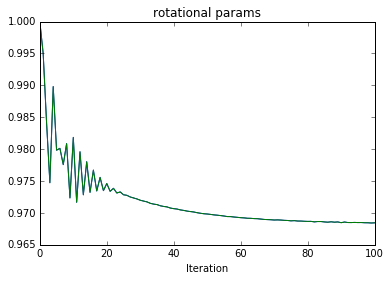

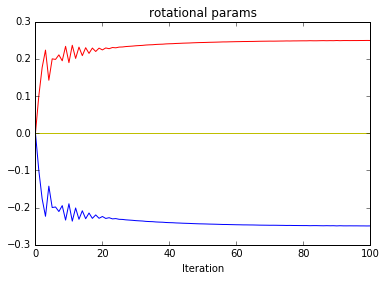

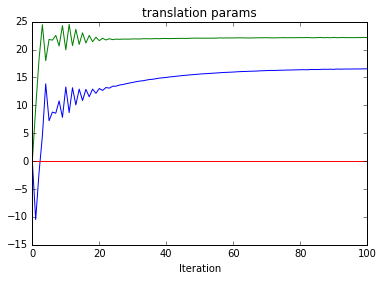

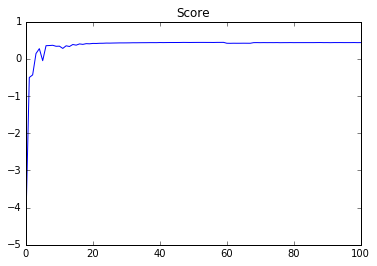

In [26]:
plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='last_value')

# Export parameters and score plots

In [27]:
affine_transform_parameters = {
    'parameters': aligner.Ts[-1],
    'centroid_m_wrt_wholebrain': aligner.centroid_m,
    'centroid_f_wrt_wholebrain': aligner.centroid_f
}

In [28]:
transform_matrix_overall = compose_alignment_parameters([affine_transform_parameters, 
                                                         transform_parameters_midplane_aligned])

In [29]:
print transform_matrix_overall

[[  9.65139828e-01  -2.49808796e-01   7.81136352e-02   4.66222344e+01]
 [  2.56026070e-01   9.63058380e-01  -8.34891096e-02  -1.39634406e+02]
 [ -5.43717585e-02   1.00577748e-01   9.93443559e-01   4.53313128e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [30]:
DataManager.save_alignment_results_v3(
    transform_parameters=convert_transform_forms(transform=transform_matrix_overall, out_form='dict'),
                       score_traj=scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=affine_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_parameters.json"
return code: 0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_scoreHistory.bp"
return code: 0
aw

In [31]:
for name_s in all_known_structures_sided:
    
    print name_s
    
    try:
        volume, origin_wrt_wholebrain = \
        DataManager.load_original_volume_v2(stack_spec=stack_m_spec, 
                                                   structure=name_s,
                                                  resolution='10.0um',
                                                  return_origin_instead_of_bbox=True)

    except:
        sys.stderr.write("Cannot load moving brain for %s\n" % name_s)
        continue
        
    transformed_volume_wrt_fixedWholebrain = \
    transform_volume_v4(volume=(volume.astype(np.int),origin_wrt_wholebrain),
                        transform=transform_matrix_overall,
                       return_origin_instead_of_bbox=True)
    
    DataManager.save_transformed_volume_v2(volume=transformed_volume_wrt_fixedWholebrain, 
                                    alignment_spec=affine_alignment_spec, 
#                                     resolution='%.1fum' % affine_aligner_parameters['resolution_um'], 
                                    structure=name_s)

Interpolating/filling sparse volume: 0.07 seconds.


5N_L


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp

5N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_5N_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.01 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

6N_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.01 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

6N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_6N_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.13 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

7N_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.13 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

7N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7N_R_origin_wrt_fixedWholebrain.txt"
return code: 0


7n_L


Interpolating/filling sparse volume: 0.37 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/scor

7n_R


Interpolating/filling sparse volume: 0.31 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_7n_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/scor

Amb_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.01 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

Amb_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Amb_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.06 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD5

LC_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.05 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

LC_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LC_R_origin_wrt_fixedWholebrain.txt"
return code: 0


LRt_L


Interpolating/filling sparse volume: 0.23 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

LRt_R


Interpolating/filling sparse volume: 0.26 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_LRt_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

Pn_L


Interpolating/filling sparse volume: 0.47 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/scor

Pn_R


Interpolating/filling sparse volume: 0.22 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Pn_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/scor

Tz_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.06 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

Tz_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Tz_R_origin_wrt_fixedWholebrain.txt"
return code: 0


VLL_L


Interpolating/filling sparse volume: 0.30 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

VLL_R


Interpolating/filling sparse volume: 0.19 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VLL_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

RMC_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.07 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

RMC_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RMC_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.14 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

SNC_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.17 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

SNC_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNC_R_origin_wrt_fixedWholebrain.txt"
return code: 0


SNR_L


Interpolating/filling sparse volume: 0.44 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

SNR_R


Interpolating/filling sparse volume: 0.46 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SNR_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

3N_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.03 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

3N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_3N_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.01 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

4N_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.01 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

4N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_4N_R_origin_wrt_fixedWholebrain.txt"
return code: 0


Sp5I_L


Interpolating/filling sparse volume: 0.19 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

Sp5I_R


Interpolating/filling sparse volume: 0.22 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5I_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

Sp5O_L


Interpolating/filling sparse volume: 0.31 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

Sp5O_R


Interpolating/filling sparse volume: 0.30 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5O_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

Sp5C_L


Interpolating/filling sparse volume: 0.76 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

Sp5C_R


Interpolating/filling sparse volume: 0.54 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_Sp5C_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0u

PBG_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.06 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

PBG_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_PBG_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.08 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

10N_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.06 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

10N_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_10N_R_origin_wrt_fixedWholebrain.txt"
return code: 0


VCA_L


Interpolating/filling sparse volume: 0.19 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/s

VCA_R


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCA_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_w

VCP_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.12 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD

VCP_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_VCP_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.17 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD5

DC_L


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_L_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.16 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589

DC_R


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_DC_R_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.03 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_AP.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_1

AP


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_AP_origin_wrt_fixedWholebrain.txt"
return code: 0
Interpolating/filling sparse volume: 0.17 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0

12N


return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_12N_origin_wrt_fixedWholebrain.txt"
return code: 0


RtTg


Interpolating/filling sparse volume: 0.42 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_RtTg_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/scor

SC


Interpolating/filling sparse volume: 2.50 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_SC_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volu

IC


Interpolating/filling sparse volume: 3.85 seconds.
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC.bp"
return code: 0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volumes/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um_IC_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/MD594/MD594_10.0um_annotationAsScoreVolume_warp109_MD589_10.0um_annotationAsScoreVolume_10.0um/score_volu